<a href="https://colab.research.google.com/github/AinsleyJacquemain/ASTRON-1221/blob/main/Ainsley_Jacquemain_Income_Versus_Education_Fitting_Data_with_a_Polynomial_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.units as u # import a Python package to call certain units.
import astropy.constants as const # import a Python package to call the value of certain constants.
import numpy as np  # import numpy package, which allows us to conduct mathematical operations for the defined quantities.
import matplotlib.pyplot as plt # import matplotlib package, which allows us to make plots.

In [44]:
MaleIncome_arr = np.array([36700.,46400.,50200.,54200.,75100.,89200.]) # include the income data (in dollars) for men at each level of education.
FemaleIncome_arr = np.array([30900.,36700.,39100.,43100.,60800.,75700.]) # include the income data (in dollars) for women at each level of education.
EducationLevel_arr = np.arange(len(MaleIncome_arr)) # describe the intervals of education levels by showing via 'len' that each level corresponds to an income.
Education_Levels = np.array(["Less than high school completion","High school completion","Some college, no degree","Associate's degree","Bachelor's degree","Master's degree or higher"]) # title the intervals.
print("Male Income:", MaleIncome_arr)
print("Female Income:", FemaleIncome_arr)
print("Education Level:", EducationLevel_arr)

Male Income: [36700. 46400. 50200. 54200. 75100. 89200.]
Female Income: [30900. 36700. 39100. 43100. 60800. 75700.]
Education Level: [0 1 2 3 4 5]


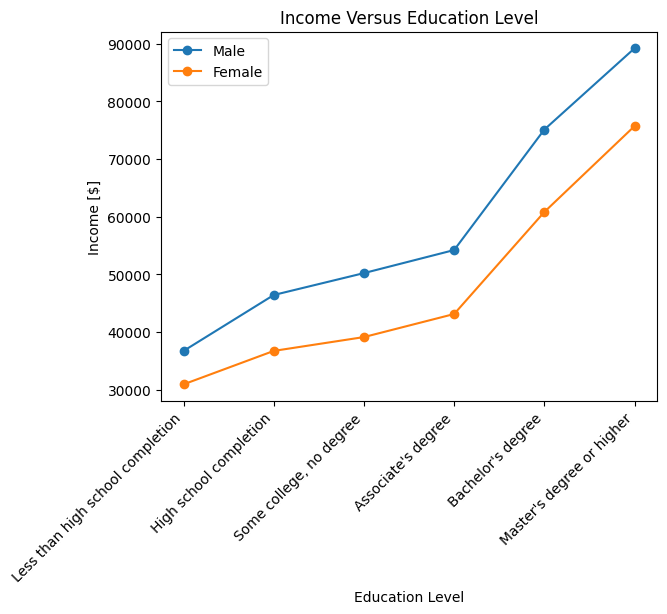

In [45]:
#Plot the data printed above to see the relationship between income and education level for each gender.
plt.plot(EducationLevel_arr, MaleIncome_arr, "o-")
plt.plot(EducationLevel_arr, FemaleIncome_arr, "o-")
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.legend(["Male", "Female"])
plt.title("Income Versus Education Level")
plt.xticks(EducationLevel_arr, Education_Levels, rotation=45, ha="right")
plt.show()

In [46]:
z_linear_male = np.polyfit(EducationLevel_arr, MaleIncome_arr, 1) # z is the linear function of x (men's education level) and y (men's income in dollars).
print("Slope: Male = ", z_linear_male[0], "in dollars per level") # consider z = [0]x + [1].
print("Y-intercept: Male = ", z_linear_male[1], "in dollars at level 0, i.e. less than high school completion")

Slope: Male =  10074.285714285712 in dollars per level
Y-intercept: Male =  33447.61904761905 in dollars at level 0, i.e. less than high school completion


In [47]:
z_linear_female = np.polyfit(EducationLevel_arr, FemaleIncome_arr, 1) # z is the linear function of x (women's education level) and y (women's income in dollars).
print("Slope: Female = ", z_linear_female[0], "in dollars per level") # consider z = [0]x + [1].
print("Y-intercept: Female = ", z_linear_female[1], "in dollars at level 0, i.e. less than high school completion")

Slope: Female =  8579.999999999998 in dollars per level
Y-intercept: Female =  26266.666666666653 in dollars at level 0, i.e. less than high school completion


In [48]:
z_quadratic_male = np.polyfit(EducationLevel_arr, MaleIncome_arr, 2) # z is the quadratic function of x (men's education level) and y (men's income in dollars).
print("Quadratic fit: Male-- Income = {:.1f} * level**2 + {:.1f} * level + {:.1f} ".format(z_quadratic_male[0], z_quadratic_male[1], z_quadratic_male[2]), "in dollars") # considrer z = [0]x^2 + [1]x + [2].

Quadratic fit: Male-- Income = 1614.3 * level**2 + 2002.9 * level + 38828.6  in dollars


In [49]:
z_quadratic_female = np.polyfit(EducationLevel_arr, FemaleIncome_arr, 2) # z is the quadratic function of x (women's education level) and y (women's income in dollars).
print("Quadratic fit: Female-- Income = {:.1f} * level**2 + {:.1f} * level + {:.1f} ".format(z_quadratic_female[0], z_quadratic_female[1], z_quadratic_female[2]), "in dollars") # considrer z = [0]x^2 + [1]x + [2].

Quadratic fit: Female-- Income = 1905.4 * level**2 + -946.8 * level + 32617.9  in dollars


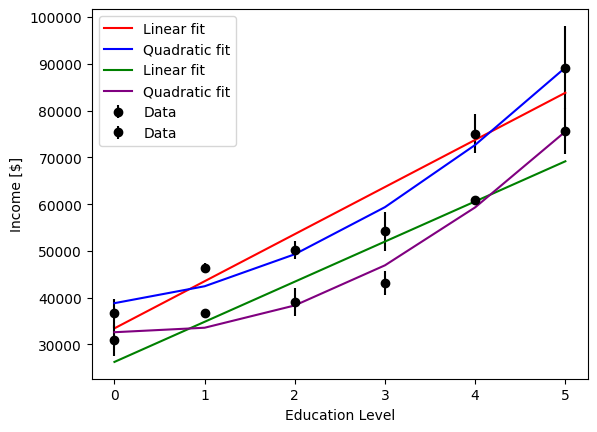

In [50]:
"""
Graph the data above to prepare to conduct a chi-square test.
In this instance, we will plot the data against the linear and quadratic fits for both genders.
We will refer to the output as the 'observation', or 'O', and the fit as the 'calculation,' or 'C'.
"""

O_male = MaleIncome_arr
O_err_male = np.array([3110,1070,2000,4130,4110,8910])
C_linear_male = z_linear_male[0] * EducationLevel_arr + z_linear_male[1]
C_quadratic_male = z_quadratic_male[0] * EducationLevel_arr**2 + z_quadratic_male[1] * EducationLevel_arr + z_quadratic_male[2]
plt.errorbar(EducationLevel_arr, O_male, yerr=O_err_male, marker="o", linestyle = "None", color = "black", label = "Data")
plt.plot(EducationLevel_arr,C_linear_male, color = "red", label = "Linear fit")
plt.plot(EducationLevel_arr,C_quadratic_male, color = "blue", label = "Quadratic fit")

O_female = FemaleIncome_arr
O_err_female = np.array([3310,960,3070,2580,860,4940])
C_linear_female = z_linear_female[0] * EducationLevel_arr + z_linear_female[1]
C_quadratic_female = z_quadratic_female[0] * EducationLevel_arr**2 + z_quadratic_female[1] * EducationLevel_arr + z_quadratic_female[2]
plt.errorbar(EducationLevel_arr, O_female, yerr=O_err_female, marker="o", linestyle = "None", color = "black", label = "Data")
plt.plot(EducationLevel_arr,C_linear_female, color = "green", label = "Linear fit")
plt.plot(EducationLevel_arr,C_quadratic_female, color = "purple", label = "Quadratic fit")

plt.legend()
plt.xlabel("Education Level")
plt.ylabel("Income [$]")
plt.show()

The chi-square statistic is a formula to compare statistical data sets and determine the 'goodness of fit.' The lower the value, the more confident the fit of the given theoretical model (i.e. the less difference between what is observed and what is expected.) The chi-square formula is as follows:

$X^2 = \sum\frac{(O_i-C_i)^2}{σ_i^2}$

The reduced chi-square statistic is similar to the chi-square statistic, but instead takes into account the data size by dividing chi-square by the degrees of freedom. This is a 'normalized' chi-squared statistic. The reduced chi-square is as follows:

$X_v^2 = \frac{X^2}{v}$

In chi-square and reduced chi-square statistics...
*   $O$ = the observation
*   $C$ = the calculation
*   $σ$ = the measurement error
*   $v$ = the degrees of freedom = $n - m$
    *   $n$ = the number of data points used in fitting
    *   $m$ = the number of fitting parameters
        *   $m$ = 2 for a linear fit
        *   $m$ = 3 for a quadratic fit

We will calculate $X_v^2$, which we would ideally like to be close to 1 from either direction.



In [51]:
n = len(O_male) # define the number of data ponits used in the fit via 'len'.
m_linear = 2
m_quadratic = 3
re_chi2_linear_male = np.sum((O_male - C_linear_male)**2 / O_err_male**2) / (n - m_linear) # define the equation for the reduced chi-square for the male data set for a linear fit.
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2_linear_male))
re_chi2_quadratic_male = np.sum((O_male - C_quadratic_male)**2 / O_err_male**2) / (n - m_quadratic) # define the equation for the reduced chi-square for the male data set for a quadratic fit.
print("Reduced Chi2 for quadratic fit = {:.2f}".format(re_chi2_quadratic_male))

Reduced Chi2 for linear fit = 4.24
Reduced Chi2 for quadratic fit = 5.42


In [52]:
n = len(O_female) # define the number of data ponits used in the fit via 'len'.
m_linear = 2
m_quadratic = 3
re_chi2_linear_female = np.sum((O_female - C_linear_female)**2 / O_err_female**2) / (n - m_linear) # define the equation for the reduced chi-square for the female data set for a linear fit.
print("Reduced Chi2 for linear fit = {:.2f}".format(re_chi2_linear_female))
re_chi2_quadratic_female = np.sum((O_female - C_quadratic_female)**2 / O_err_female**2) / (n - m_quadratic) # define the equation for the reduced chi-square for the female data set for a quadratic fit.
print("Reduced Chi2 for quadratic fit = {:.2f}".format(re_chi2_quadratic_female))

Reduced Chi2 for linear fit = 5.35
Reduced Chi2 for quadratic fit = 5.36


In [53]:
print((O_male - C_linear_male)**2 / O_err_male**2) # print the reduced chi-square for each individual education level (without summing).

[1.09365927 7.23507049 2.88352744 5.25827784 0.10872954 0.36472278]


In [54]:
np.set_printoptions(suppress=True) # suppress=True disables scientific notation and shows the answers in a more-readable decimal format.
print((O_male - C_quadratic_male)**2 / O_err_male**2) # print the reduced chi-square for each individual education level (without summing).

[ 0.46844184 13.65741594  0.20637551  1.5644463   0.34997691  0.        ]


In [55]:
print((O_female - C_linear_female)**2 / O_err_female**2) # print the reduced chi-square for each individual education level (without summing).

[ 1.95943609  3.72704475  1.98623269 11.91765986  0.06153476  1.74910441]


In [56]:
np.set_printoptions(suppress=True) # suppress=True disables scientific notation and shows the answers in a more-readable decimal format.
print((O_female - C_quadratic_female)**2 / O_err_female**2) # print the reduced chi-square for each individual education level (without summing).

[ 0.2693507  10.58669539  0.06036636  2.19879962  2.97591155  0.00135947]


In the case of both genders, the respective $X_v^2$ values for the linear fits are closer to one than the $X_v^2$ values for the quadratic fits, which implies that linear models better fit the data for both genders. The $X_v^2$ values for the female data are closer to one than the respective $X_v^2$ values for the male data, implying that we have a greater confidence in the linear fit for the female data than for the male data.

In conclusion, looking at the linear fits (the better fits) for each gender, there is a clear difference in the income levels between women and men educated at the same level. According to our fit, men tend to make more than women at the same education level. Let's change that soon! ☺

♥ ♀ = ♂ ♥

